In [76]:
import pandas as pd
import os
import altair as alt
alt.data_transformers.disable_max_rows()
import warnings 
warnings.filterwarnings('ignore')

### Notes

Trying to experiment with loading in data programmatically

In [62]:
files = os.listdir('repo_data/')

In [63]:
initial_dfs = []
for dir, subdir, files in os.walk('repo_data/'):
    print("directory", dir)
    # print("subdirectory", subdir)
    # print("files", files)
    for file in files:
        if file.endswith('.csv'):
            # print("file", file)
            df = pd.read_csv(os.path.join(dir, file))
            df['file_path'] = os.path.join(dir, file)
            df['directory'] = dir
            initial_dfs.append(df)

directory repo_data/
directory repo_data/humanities
directory repo_data/public_history
directory repo_data/cultural_analytics
directory repo_data/computational_humanities
directory repo_data/digital_history
directory repo_data/digital_cultural_heritage
directory repo_data/digital_humanities


In [64]:
combined_df = pd.concat(initial_dfs)

In [65]:
combined_df.directory.value_counts()

repo_data/humanities                   3172
repo_data/digital_humanities           2073
repo_data/digital_history               609
repo_data/public_history                521
repo_data/cultural_analytics            104
repo_data/computational_humanities       68
repo_data/digital_cultural_heritage      30
Name: directory, dtype: int64

- Need to subset the data to only include repositories related to teaching

In [66]:
combined_df

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,permissions.triage,permissions.pull,license,search_query,search_term,search_term_source,search_type,natural_language,file_path,directory
0,272758132.0,MDEwOlJlcG9zaXRvcnkyNzI3NTgxMzI=,caa,nancyum/caa,0.0,https://github.com/nancyum/caa,Data from the College Art Association's disser...,0.0,https://api.github.com/repos/nancyum/caa,https://api.github.com/repos/nancyum/caa/forks,...,0.0,1.0,NaN,https://api.github.com/search/repositories?q=t...,Humanities,Humanities,tagged,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_tagged_humanities-d...,repo_data/humanities
1,232378452.0,MDEwOlJlcG9zaXRvcnkyMzIzNzg0NTI=,peripheralmss,midwest-manuscripts/peripheralmss,0.0,https://github.com/midwest-manuscripts/periphe...,A project to digitize and create descriptive m...,0.0,https://api.github.com/repos/midwest-manuscrip...,https://api.github.com/repos/midwest-manuscrip...,...,0.0,1.0,NaN,https://api.github.com/search/repositories?q=t...,Humanities,Humanities,tagged,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_tagged_humanities-d...,repo_data/humanities
2,242184823.0,MDEwOlJlcG9zaXRvcnkyNDIxODQ4MjM=,zotero-hum-data,AlMaturidiyya/zotero-hum-data,0.0,https://github.com/AlMaturidiyya/zotero-hum-data,Teaching Zotero for Humanities Data Management,0.0,https://api.github.com/repos/AlMaturidiyya/zot...,https://api.github.com/repos/AlMaturidiyya/zot...,...,0.0,1.0,NaN,https://api.github.com/search/repositories?q=t...,Humanities,Humanities,tagged,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_tagged_humanities-d...,repo_data/humanities
3,487622885.0,R_kgDOHRCI5Q,machinevisionscripts,MachineVisionUiB/machinevisionscripts,0.0,https://github.com/MachineVisionUiB/machinevis...,"Scripts for analysing data from ""A Dataset Doc...",0.0,https://api.github.com/repos/MachineVisionUiB/...,https://api.github.com/repos/MachineVisionUiB/...,...,0.0,1.0,NaN,https://api.github.com/search/repositories?q=t...,Humanities,Humanities,tagged,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_tagged_humanities-d...,repo_data/humanities
4,339055025.0,MDEwOlJlcG9zaXRvcnkzMzkwNTUwMjU=,historic-maps,wouterbeek/historic-maps,0.0,https://github.com/wouterbeek/historic-maps,ETL that generates the IISG dataset on histori...,0.0,https://api.github.com/repos/wouterbeek/histor...,https://api.github.com/repos/wouterbeek/histor...,...,0.0,1.0,NaN,https://api.github.com/search/repositories?q=t...,Humanities,Humanities,tagged,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_tagged_humanities-d...,repo_data/humanities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,179341717.0,MDEwOlJlcG9zaXRvcnkxNzkzNDE3MTc=,Digital-Pedagogy-An-EPIC-Seminar,ucla-digital-humanities/Digital-Pedagogy-An-EP...,0.0,https://github.com/ucla-digital-humanities/Dig...,This seminar will help faculty and graduate st...,0.0,https://api.github.com/repos/ucla-digital-huma...,https://api.github.com/repos/ucla-digital-huma...,...,0.0,1.0,NaN,https://api.github.com/search/repositories?q=%...,Digital Humanities,Digital Humanities,searched,"en, ny, ha, ig, lb, mg, sm, sn, st, tl, yo",repo_data/digital_humanities/repos_searched_Di...,repo_data/digital_humanities
167,192062525.0,MDEwOlJlcG9zaXRvcnkxOTIwNjI1MjU=,chinesesocialcredit,arnaudcelie/chinesesocialcredit,0.0,https://github.com/arnaudcelie/chinesesocialcr...,This study intention is to extract a solid und...,0.0,https://api.github.com/repos/arnaudcelie/chine...,https://api.github.com/repos/arnaudcelie/chine...,...,0.0,1.0,NaN,https://api.github.com/search/repositories?q=%...,Digital Humanities,Digital Humanities,searched,"en, ny, ha, ig, lb, mg, sm, sn, st, tl, yo",repo_data/digital_humanities/repos_searched_Di...,repo_data/digital_humanities
168,173676891.0,MDEwOlJlcG9zaXRvcnkxNzM2NzY4OTE=,novel_parser,jbaylisswagner/novel_parser,0.0,https://github.com/jbaylisswagner/novel_parser,"This Python file, created for a

In [67]:
potential_pedagogy_terms = [
    "pedagogy",
    "teaching",
    "education",
    "learning",
    "curriculum",
    "instruction",
    "syllabus",
    "paper",
    "class",
    "course",
    "lesson",
    "lecture",
    "semester"
    ]

### lower casing description and names, loop through each term

In [68]:
combined_df["lower_description"] = combined_df["description"].str.lower()
combined_df["lower_name"] = combined_df["name"].str.lower()


In [74]:
combined_df['length_lower_description'] = combined_df['lower_description'].str.len()

In [78]:
alt.Chart(combined_df[combined_df.directory.str.contains('public') == False][['length_lower_description', 'directory']]).mark_bar().encode(
    alt.X('length_lower_description:Q', bin=alt.Bin(maxbins=100)),
    y='count()',
    row='directory'
)

alt.Chart(...)

In [70]:
dfs_combined = []
for term in potential_pedagogy_terms:
    selected_rows = combined_df[(combined_df["lower_description"].str.contains(term)) | (combined_df["lower_name"].str.contains(term))]
    print(term, len(selected_rows))
    dfs_combined.append(selected_rows)

pedagogy 19
teaching 63
education 71
learning 159
curriculum 11
instruction 30
syllabus 29
paper 111
class 296
course 623
lesson 32
lecture 26
semester 32


In [72]:
combined_pedagogy_df = pd.concat(dfs_combined)
combined_pedagogy_df = combined_pedagogy_df.drop_duplicates(subset=['id'])
combined_pedagogy_df

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,license,search_query,search_term,search_term_source,search_type,natural_language,file_path,directory,lower_description,lower_name
17,123321169.0,MDEwOlJlcG9zaXRvcnkxMjMzMjExNjk=,GitCtrl,publishing-bitbytebit/GitCtrl,0.0,https://github.com/publishing-bitbytebit/GitCtrl,GitHub Resources for Digital Humanities Pedagogy,0.0,https://api.github.com/repos/publishing-bitbyt...,https://api.github.com/repos/publishing-bitbyt...,...,NaN,https://api.github.com/search/repositories?q=t...,Humanities,Humanities,tagged,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_tagged_humanities.csv,repo_data/humanities,github resources for digital humanities pedagogy,gitctrl
81,39461412.0,MDEwOlJlcG9zaXRvcnkzOTQ2MTQxMg==,collaboration-keyword,katinalynn/collaboration-keyword,0.0,https://github.com/katinalynn/collaboration-ke...,Materials for Digital Pedagogy in the Humanities,0.0,https://api.github.com/repos/katinalynn/collab...,https://api.github.com/repos/katinalynn/collab...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,materials for digital pedagogy in the humanities,collaboration-keyword
0,22125212.0,MDEwOlJlcG9zaXRvcnkyMjEyNTIxMg==,digitalpedagogy,curateteaching/digitalpedagogy,0.0,https://github.com/curateteaching/digitalpedagogy,"Digital Pedagogy in the Humanities: Concepts, ...",0.0,https://api.github.com/repos/curateteaching/di...,https://api.github.com/repos/curateteaching/di...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,"digital pedagogy in the humanities: concepts, ...",digitalpedagogy
106,57695088.0,MDEwOlJlcG9zaXRvcnk1NzY5NTA4OA==,intersectionality,roopikarisam/intersectionality,0.0,https://github.com/roopikarisam/intersectionality,"""Intersectionality"" material for Keywords for ...",0.0,https://api.github.com/repos/roopikarisam/inte...,https://api.github.com/repos/roopikarisam/inte...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,"""intersectionality"" material for keywords for ...",intersectionality
135,59076539.0,MDEwOlJlcG9zaXRvcnk1OTA3NjUzOQ==,iteration,anetv/iteration,0.0,https://github.com/anetv/iteration,"Repo for ""iteration"" keyword for Digital Pedag...",0.0,https://api.github.com/repos/anetv/iteration,https://api.github.com/repos/anetv/iteration/f...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,"repo for ""iteration"" keyword for digital pedag...",iteration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,445430659.0,R_kgDOGoy7gw,epfl_semester_proj_dhlab,aliciasoria/epfl_semester_proj_dhlab,0.0,https://github.com/aliciasoria/epfl_semester_p...,Master semester project at Digital Humanities ...,0.0,https://api.github.com/repos/aliciasoria/epfl_...,https://api.github.com/repos/aliciasoria/epfl_...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,master semester project at digital humanities ...,epfl_semester_proj_dhlab
59,179879683.0,MDEwOlJlcG9zaXRvcnkxNzk4Nzk2ODM=,enrollment_humanities,adiya1/enrollment_humanities,0.0,https://github.com/adiya1/enrollment_humanities,Explored the change that occured between Sprin...,0.0,https://api.github.com/repos/adiya1/enrollment...,https://api.github.com/repos/adiya1/enrollment...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,se

In [73]:
combined_pedagogy_df.directory.value_counts()

repo_data/humanities            586
repo_data/public_history         96
repo_data/digital_history        92
repo_data/cultural_analytics     23
Name: directory, dtype: int64

In [14]:
combined_pedagogy_df.to_csv('combined_pedagogy_data.csv',index=False)

# Im not sure this df was read into the csv in the way we want (?)
# Im understanding the dataframe better than the csv

### Larger Research Questions / Aims and Next Coding Steps
- Data Collected !  {combined_pedagogy_data.csv})
- Skills Analyzed   (skills being taught to students, return to Hack/Tact/Yack, do a Hack/Tact/Yack word count analysis of the dataset, but we need to know what repository each word comes from ? What each repository teaches? )
- Pedagogy Analyzed  (Pedagogical Practices Considered, do a Pedagogy Approaches word count analysis of the combined pedagogy data) 
- Present Current Practices, what skills are most taught, what pedagogical approaches most used
- Best Practices Evaluation: what are instructor / pedagogical goals? what skills are most effective at achieving instructor goals? What pedagogical approaches are most effective in students achieving certain skills and/or reaching pedagogical goals? 
    - value of interviews here, qualitative questions about big picture goals (not just "i want my dh students to learn coding/python" but also "i want them to think algorithmically / understand affordances and limitations of digital methods / do x kind of research..." )
    - similar qualitative research / questions about if students were able to meet these goals and through what skills and what pedagogical approaches (ie learning python loops helped and so did group projects)
    - maybe we want to limit questions to success of just teaching concrete skills through which approaches (ie coding + projects, not history of the field through group reflection posting)
- Owen Next Step ? --> Hack Tact Yack word count breakdowns for repo_data and Pedagogy Approach word breakdown for combined_pedagogy data_csv or df

Research
- array of practices > rigid "best practices"
- Combine with Elizabeth about how students learn
- IRB proposal, professor Ocepek 

Code
- Visualization --> term, term count, repository, 3 fields 

### Hack Word Count within pedagogy data 

In [11]:
potential_hack_terms = [
    'construct',
    'create',
    'stand up',
    'web application',
    'interface',
    'web design',
    'coding',
    'computation',
    'programming',
    'algorithm',
    'processing',
    'machine learning',
    'software development',
    'data analysis',
    'text analysis',
    'network analysis',
    'archive',
    'dataset',
    'maps',
    'visualization',
    'techniques',
    'python',
    'django',
    'omeka',
    'GitHub',
    'Safari Techbooks',
    'Developer Networks',
    'Programming Environment',
    'Mozilla',
    'Anaconda',
    'GIS',
    'Visual Studio Code',
    'TEI',
    'SQL',
    ]

In [12]:
combined_pedagogy_repo_data = pd.read_csv(
    "combined_pedagogy_data.csv")

In [13]:
dfs_hack = []
for term in potential_hack_terms:
    selected_rows = combined_pedagogy_repo_data[(combined_pedagogy_repo_data["lower_description"].str.contains(term)) | (combined_pedagogy_repo_data["lower_name"].str.contains(term))]
    print(term, len(selected_rows))
    dfs_hack.append(selected_rows)

    # I dont think there is name or desscription in this csv, (or any headings at all ?) How does this csv work ?
    # Could we use the csv to print keyword AND the repo title  ? 
    # Better to read through the dataframe? 
    # potentially cannot use the 'len' function as a way to count if we do not have clear rows (?)
    

construct 11
create 81
stand up 0
web application 3
interface 6
web design 1
coding 26
computation 37
programming 51
algorithm 29
processing 15
machine learning 32
software development 1
data analysis 12
text analysis 10
network analysis 4
archive 19
dataset 20
maps 5
visualization 17
techniques 19
python 40
django 3
omeka 0
GitHub 0
Safari Techbooks 0
Developer Networks 0
Programming Environment 0
Mozilla 0
Anaconda 0
GIS 0
Visual Studio Code 0
TEI 0
SQL 0


### Tact Word Count within pedagogy data 

In [14]:
potential_tact_terms = [
    'discilpine',
    'field',
    'topic',
    'historical',
    'cultural',
    'science',
    'studies',
    'area',
    'literary',
    'public facing',
    'contribution',
    'meaningful',
    'purpose',
    'application',
    'research',
    'thesis',
    'hypothesis',
    'interpretation',
    'scope',
    'size',
]

In [15]:
dfs_tact = []
for term in potential_tact_terms:
    selected_rows = combined_pedagogy_repo_data[(combined_pedagogy_repo_data["lower_description"].str.contains(term)) | (combined_pedagogy_repo_data["lower_name"].str.contains(term))]
    print(term, len(selected_rows))
    dfs_tact.append(selected_rows)

discilpine 0
field 40
topic 41
historical 18
cultural 42
science 95
studies 19
area 27
literary 7
public facing 0
contribution 7
meaningful 4
purpose 29
application 52
research 67
thesis 8
hypothesis 3
interpretation 5
scope 11
size 24


### Yack Word Count within pedagogy data 

In [16]:
potential_yack_terms = [
    'debate',
    'discussion',
    'perspectives',
    'conflict',
    'participants',
    'team',
    'librarian',
    'Digital Humanities',
    'Theory',
    'Critical',
    'History',
    'Digital Age',
    'Ethics',
    'Politics',
    'Problems',
    'issues',
    'limits',
    'abuse',
    'environment',
    'fossil fuels'
]

In [17]:
dfs_yack = []
for term in potential_yack_terms:
    selected_rows = combined_pedagogy_repo_data[(combined_pedagogy_repo_data["lower_description"].str.contains(term)) | (combined_pedagogy_repo_data["lower_name"].str.contains(term))]
    print(term, len(selected_rows))
    dfs_yack.append(selected_rows)

debate 2
discussion 11
perspectives 4
conflict 7
participants 8
team 24
librarian 0
Digital Humanities 0
Theory 0
Critical 0
History 0
Digital Age 0
Ethics 0
Politics 0
Problems 0
issues 23
limits 6
abuse 2
environment 17
fossil fuels 0


### Pedagogy Word Count within pedagogy data

In [18]:
potential_pedagogy_terms = [
    'supervised',
    'unsupervised',
    'project',
    'presentation',
    'deliverable',
    'short term',
    'long term',
    'planning',
    'evaluation',
    'reflection',
    'student needs',
    'conferences',
    'team',
    'group work',
    'assignment',
    'cooperate',
    'pair programming',
    'group programming',
    'lab',
    'classroom',
    'virtual'
]

In [20]:
dfs_pedagogy = []
for term in potential_pedagogy_terms:
    selected_rows = combined_pedagogy_repo_data[(combined_pedagogy_repo_data["lower_description"].str.contains(term)) | (combined_pedagogy_repo_data["lower_name"].str.contains(term))]
    print(term, len(selected_rows))
    dfs_pedagogy.append(selected_rows)

supervised 7
unsupervised 3
project 196
presentation 29
deliverable 3
short term 1
long term 0
planning 7
evaluation 5
reflection 3
student needs 0
conferences 1
team 24
group work 0
assignment 37
cooperate 0
pair programming 0
group programming 0
lab 94
classroom 10
virtual 8


### Next Steps (Feb 17)

- Visualization altair, horizontal stacked bar chart with colors
- coding this 3 fields, x = term count, y = terms, color = repositories
- Getting counts data first ! how to count terms, 
    - 'len' not really what we want
    - frequency count - for loops 
    - line by line steps to do (logic puzzling)
    - dictionary --> new dataframe
    - panda things
- Working on IRB stuff, shift to that if overwhelmed
- # combined_pedagogy_repo_data.lower_description.str.count(term)
    - column for each term (?)

In [21]:
combined_pedagogy_df


,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,license,search_query,search_term,search_term_source,search_type,natural_language,file_path,directory,lower_description,lower_name
17,123321169.0,MDEwOlJlcG9zaXRvcnkxMjMzMjExNjk=,GitCtrl,publishing-bitbytebit/GitCtrl,0.0,https://github.com/publishing-bitbytebit/GitCtrl,GitHub Resources for Digital Humanities Pedagogy,0.0,https://api.github.com/repos/publishing-bitbyt...,https://api.github.com/repos/publishing-bitbyt...,...,NaN,https://api.github.com/search/repositories?q=t...,Humanities,Humanities,tagged,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_tagged_humanities.csv,repo_data/humanities,github resources for digital humanities pedagogy,gitctrl
81,39461412.0,MDEwOlJlcG9zaXRvcnkzOTQ2MTQxMg==,collaboration-keyword,katinalynn/collaboration-keyword,0.0,https://github.com/katinalynn/collaboration-ke...,Materials for Digital Pedagogy in the Humanities,0.0,https://api.github.com/repos/katinalynn/collab...,https://api.github.com/repos/katinalynn/collab...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,materials for digital pedagogy in the humanities,collaboration-keyword
0,22125212.0,MDEwOlJlcG9zaXRvcnkyMjEyNTIxMg==,digitalpedagogy,curateteaching/digitalpedagogy,0.0,https://github.com/curateteaching/digitalpedagogy,"Digital Pedagogy in the Humanities: Concepts, ...",0.0,https://api.github.com/repos/curateteaching/di...,https://api.github.com/repos/curateteaching/di...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,"digital pedagogy in the humanities: concepts, ...",digitalpedagogy
106,57695088.0,MDEwOlJlcG9zaXRvcnk1NzY5NTA4OA==,intersectionality,roopikarisam/intersectionality,0.0,https://github.com/roopikarisam/intersectionality,"""Intersectionality"" material for Keywords for ...",0.0,https://api.github.com/repos/roopikarisam/inte...,https://api.github.com/repos/roopikarisam/inte...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,"""intersectionality"" material for keywords for ...",intersectionality
135,59076539.0,MDEwOlJlcG9zaXRvcnk1OTA3NjUzOQ==,iteration,anetv/iteration,0.0,https://github.com/anetv/iteration,"Repo for ""iteration"" keyword for Digital Pedag...",0.0,https://api.github.com/repos/anetv/iteration,https://api.github.com/repos/anetv/iteration/f...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,"repo for ""iteration"" keyword for digital pedag...",iteration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,445430659.0,R_kgDOGoy7gw,epfl_semester_proj_dhlab,aliciasoria/epfl_semester_proj_dhlab,0.0,https://github.com/aliciasoria/epfl_semester_p...,Master semester project at Digital Humanities ...,0.0,https://api.github.com/repos/aliciasoria/epfl_...,https://api.github.com/repos/aliciasoria/epfl_...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,master semester project at digital humanities ...,epfl_semester_proj_dhlab
59,179879683.0,MDEwOlJlcG9zaXRvcnkxNzk4Nzk2ODM=,enrollment_humanities,adiya1/enrollment_humanities,0.0,https://github.com/adiya1/enrollment_humanities,Explored the change that occured between Sprin...,0.0,https://api.github.com/repos/adiya1/enrollment...,https://api.github.com/repos/adiya1/enrollment...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,se

### Owen Experiments Using the Melanie Walsh Text

In [22]:
combined_pedagogy_df.sample(10)

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,license,search_query,search_term,search_term_source,search_type,natural_language,file_path,directory,lower_description,lower_name
259,423593765.0,R_kgDOGT-HJQ,richmond_datascience_talk,MikeTrizna/richmond_datascience_talk,0.0,https://github.com/MikeTrizna/richmond_datasci...,Invited presentation to U of Richmond Digital ...,0.0,https://api.github.com/repos/MikeTrizna/richmo...,https://api.github.com/repos/MikeTrizna/richmo...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,invited presentation to u of richmond digital ...,richmond_datascience_talk
86,37902157.0,MDEwOlJlcG9zaXRvcnkzNzkwMjE1Nw==,cfh-lectures,UUDigitalHumanitieslab/cfh-lectures,0.0,https://github.com/UUDigitalHumanitieslab/cfh-...,WordPress child theme for the Centre for the H...,0.0,https://api.github.com/repos/UUDigitalHumaniti...,https://api.github.com/repos/UUDigitalHumaniti...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,wordpress child theme for the centre for the h...,cfh-lectures
296,283996555.0,MDEwOlJlcG9zaXRvcnkyODM5OTY1NTU=,DLfM2020,bacor/DLfM2020,0.0,https://github.com/bacor/DLfM2020,Code and data for the two case studies in the ...,0.0,https://api.github.com/repos/bacor/DLfM2020,https://api.github.com/repos/bacor/DLfM2020/forks,...,NaN,https://api.github.com/search/repositories?q=t...,Humanities,Humanities,tagged,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_tagged_digital-huma...,repo_data/humanities,code and data for the two case studies in the ...,dlfm2020
304,357992303.0,MDEwOlJlcG9zaXRvcnkzNTc5OTIzMDM=,GephiWorld,ranjiGT/GephiWorld,0.0,https://github.com/ranjiGT/GephiWorld,"Some Network Analysis, Visualizations, artwork...",0.0,https://api.github.com/repos/ranjiGT/GephiWorld,https://api.github.com/repos/ranjiGT/GephiWorl...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,"some network analysis, visualizations, artwork...",gephiworld
285,277419480.0,MDEwOlJlcG9zaXRvcnkyNzc0MTk0ODA=,dh100final,rishabh-parekh/dh100final,0.0,https://github.com/rishabh-parekh/dh100final,This is the final project for my Digital Human...,0.0,https://api.github.com/repos/rishabh-parekh/dh...,https://api.github.com/repos/rishabh-parekh/dh...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,this is the final project for my digital human...,dh100final
105,248458881.0,MDEwOlJlcG9zaXRvcnkyNDg0NTg4ODE=,HBM-SpatialHumanitiesIntro,RebeccaKahn/HBM-SpatialHumanitiesIntro,0.0,https://github.com/RebeccaKahn/HBM-SpatialHuma...,The syllabus from an introductory course to th...,0.0,https://api.github.com/repos/RebeccaKahn/HBM-S...,https://api.github.com/repos/RebeccaKahn/HBM-S...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,the syllabus from an introductory course to th...,hbm-spatialhumanitiesintro
101,36316086.0,MDEwOlJlcG9zaXRvcnkzNjMxNjA4Ng==,dhsi2016-visualization,hepplerj/dhsi2016-visualization,0.0,https://github.com/hepplerj/dhsi2016-visualiza...,Repository for DHSI 2016 course on R and Data ...,0.0,https://api.github.com/repos/hepplerj/dhsi2016...,https://api.github.com/repos/hepplerj/dhsi2016...,...,NaN,https://api.github.com/search/repositories?q=%...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,repository

In [23]:
combined_pedagogy_df.describe(include='all')

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,license,search_query,search_term,search_term_source,search_type,natural_language,file_path,directory,lower_description,lower_name
count,7.970000e+02,797,797,797,797.000000,797,797,797.0,797,797,...,0.0,797,797,797,797,797,797,797,797,797
unique,NaN,797,762,797,NaN,797,782,NaN,797,797,...,NaN,55,4,4,2,4,21,4,782,756
top,NaN,MDEwOlJlcG9zaXRvcnkxMjMzMjExNjk=,hist3814o,publishing-bitbytebit/GitCtrl,NaN,https://github.com/publishing-bitbytebit/GitCtrl,# Node Express Handlebars ### Overview In th...,NaN,https://api.github.com/repos/publishing-bitbyt...,https://api.github.com/repos/publishing-bitbyt...,...,NaN,https://api.github.com/search/repositories?q=P...,Humanities,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/public_history/repos_searched_Public...,repo_data/humanities,# node express handlebars ### overview in th...,hist3814o
freq,NaN,1,12,1,NaN,1,4,NaN,1,1,...,NaN,51,586,586,711,586,96,586,4,13
mean,2.507645e+08,NaN,NaN,NaN,0.001255,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.574859e+08,NaN,NaN,NaN,0.035422,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.241546e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.175697e+08,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.303263e+08,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.694889e+08,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
combined_pedagogy_df['description']


17      GitHub Resources for Digital Humanities Pedagogy
81     Materials for Digital Pedagogy in the Humanities 
0      Digital Pedagogy in the Humanities: Concepts, ...
106    "Intersectionality" material for Keywords for ...
135    Repo for "iteration" keyword for Digital Pedag...
                             ...                        
187    Master semester project at Digital Humanities ...
59     Explored the change that occured between Sprin...
210    Mengfei Liu Digital Humanities project for HUM...
475    Steam Gift Cards Store Semester Project for We...
494    This is a Vehicle Management System created fo...
Name: description, Length: 797, dtype: object

In [25]:
combined_pedagogy_df[['name', 'description', 'html_url']]

,name,description,html_url
17,GitCtrl,GitHub Resources for Digital Humanities Pedagogy,https://github.com/publishing-bitbytebit/GitCtrl
81,collaboration-keyword,Materials for Digital Pedagogy in the Humanities,https://github.com/katinalynn/collaboration-ke...
0,digitalpedagogy,"Digital Pedagogy in the Humanities: Concepts, ...",https://github.com/curateteaching/digitalpedagogy
106,intersectionality,"""Intersectionality"" material for Keywords for ...",https://github.com/roopikarisam/intersectionality
135,iteration,"Repo for ""iteration"" keyword for Digital Pedag...",https://github.com/anetv/iteration
...,...,...,...
187,epfl_semester_proj_dhlab,Master semester project at Digital Humanities ...,https://github.com/aliciasoria/epfl_semester_p...
59,enrollment_humanities,Explored the change that occured between Sprin...,https://github.com/adiya1/enrollment_humanities
210,MengfeiLiuDHproject,Mengfei Liu Digital Humanities project for HUM...,https://github.com/terhinurmikko/MengfeiLiuDHp...
475,Steam-Gift-Cards-Store,Steam Gift Cards Store Semester Project for We...,https://github.com/maliksh7/Steam-Gift-Cards-S...


In [26]:
# Dictionary
given_hub = {'name': 'GitCtrl', 'description': 'GitHub Resources for Digital Humanities Pedagogy', 'html_url': 'https://github.com/publishing-bitbytebit/GitCtrl'}
print(given_hub['name'])
print(given_hub['description'])

GitCtrl
GitHub Resources for Digital Humanities Pedagogy


In [27]:
# hack_counts_description = combined_pedagogy_df['lower_description'].str.count(potential_hack_terms)
# hack_counts_description

In [34]:
# for terms in combined_pedagogy_df['lower_description'].str:
  #  selected_rows = combined_pedagogy_repo_data[(combined_pedagogy_repo_data["lower_description"].str.contains(term)) | (combined_pedagogy_repo_data["lower_name"].str.contains(term))]
   # print(term, len(selected_rows))
   # dfs_pedagogy.append(selected_rows)

In [36]:
#Loop through terms and save counts as columns
for term in potential_hack_terms:
    combined_pedagogy_df[f'hack_term_{term}'] = combined_pedagogy_df.lower_description.str.count(term.lower())
for term in potential_pedagogy_terms:
    combined_pedagogy_df[f'pedagogy_term_{term}'] = combined_pedagogy_df.lower_description.str.count(term.lower())
for term in potential_tact_terms:
    combined_pedagogy_df[f'tact_term_{term}'] = combined_pedagogy_df.lower_description.str.count(term.lower())
for term in potential_yack_terms:
    combined_pedagogy_df[f'yack_term_{term}'] = combined_pedagogy_df.lower_description.str.count(term.lower())  

In [43]:
combined_pedagogy_df.columns

Index(['id', 'node_id', 'name', 'full_name', 'private', 'html_url',
       'description', 'fork', 'url', 'forks_url',
       ...
       'yack_term_History', 'yack_term_Digital Age', 'yack_term_Ethics',
       'yack_term_Politics', 'yack_term_Problems', 'yack_term_issues',
       'yack_term_limits', 'yack_term_abuse', 'yack_term_environment',
       'yack_term_fossil fuels'],
      dtype='object', length=211)

In [37]:
# Subset columns to only include the term counts for melting the dataframe
all_cols = combined_pedagogy_df.columns.tolist()
remaining_cols = all_cols.copy()
melted_cols = all_cols.copy()
for col in all_cols:
    for term_type in ['hack_term', 'pedagogy_term', 'tact_term', 'yack_term']:
        if term_type in col:
            remaining_cols.remove(col)
melted_cols = [col for col in melted_cols if col not in remaining_cols]

In [38]:

# Melt the dataframe https://pandas.pydata.org/docs/user_guide/reshaping.html
melted_pedagogy_df = pd.melt(combined_pedagogy_df, id_vars=remaining_cols, value_vars=melted_cols)

In [47]:
# Check values
len(combined_pedagogy_df), len(melted_pedagogy_df[melted_pedagogy_df.value > 0]), len(melted_pedagogy_df)

(797, 2089, 75715)

In [40]:
# Split the variable column into term_type and variable
melted_pedagogy_df['term_type'] = melted_pedagogy_df.variable.str.split('_').str[0:2].str.join('_')
melted_pedagogy_df['variable'] = melted_pedagogy_df.variable.str.split('_').str[2:].str.join(' ')
melted_pedagogy_df

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,search_term_source,search_type,natural_language,file_path,directory,lower_description,lower_name,variable,value,term_type
0,123321169.0,MDEwOlJlcG9zaXRvcnkxMjMzMjExNjk=,GitCtrl,publishing-bitbytebit/GitCtrl,0.0,https://github.com/publishing-bitbytebit/GitCtrl,GitHub Resources for Digital Humanities Pedagogy,0.0,https://api.github.com/repos/publishing-bitbyt...,https://api.github.com/repos/publishing-bitbyt...,...,Humanities,tagged,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_tagged_humanities.csv,repo_data/humanities,github resources for digital humanities pedagogy,gitctrl,construct,0,hack_term
1,39461412.0,MDEwOlJlcG9zaXRvcnkzOTQ2MTQxMg==,collaboration-keyword,katinalynn/collaboration-keyword,0.0,https://github.com/katinalynn/collaboration-ke...,Materials for Digital Pedagogy in the Humanities,0.0,https://api.github.com/repos/katinalynn/collab...,https://api.github.com/repos/katinalynn/collab...,...,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,materials for digital pedagogy in the humanities,collaboration-keyword,construct,0,hack_term
2,22125212.0,MDEwOlJlcG9zaXRvcnkyMjEyNTIxMg==,digitalpedagogy,curateteaching/digitalpedagogy,0.0,https://github.com/curateteaching/digitalpedagogy,"Digital Pedagogy in the Humanities: Concepts, ...",0.0,https://api.github.com/repos/curateteaching/di...,https://api.github.com/repos/curateteaching/di...,...,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,"digital pedagogy in the humanities: concepts, ...",digitalpedagogy,construct,0,hack_term
3,57695088.0,MDEwOlJlcG9zaXRvcnk1NzY5NTA4OA==,intersectionality,roopikarisam/intersectionality,0.0,https://github.com/roopikarisam/intersectionality,"""Intersectionality"" material for Keywords for ...",0.0,https://api.github.com/repos/roopikarisam/inte...,https://api.github.com/repos/roopikarisam/inte...,...,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,"""intersectionality"" material for keywords for ...",intersectionality,construct,0,hack_term
4,59076539.0,MDEwOlJlcG9zaXRvcnk1OTA3NjUzOQ==,iteration,anetv/iteration,0.0,https://github.com/anetv/iteration,"Repo for ""iteration"" keyword for Digital Pedag...",0.0,https://api.github.com/repos/anetv/iteration,https://api.github.com/repos/anetv/iteration/f...,...,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,"repo for ""iteration"" keyword for digital pedag...",iteration,construct,0,hack_term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75710,445430659.0,R_kgDOGoy7gw,epfl_semester_proj_dhlab,aliciasoria/epfl_semester_proj_dhlab,0.0,https://github.com/aliciasoria/epfl_semester_p...,Master semester project at Digital Humanities ...,0.0,https://api.github.com/repos/aliciasoria/epfl_...,https://api.github.com/repos/aliciasoria/epfl_...,...,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,master semester project at digital humanities ...,epfl_semester_proj_dhlab,fossil fuels,0,yack_term
75711,179879683.0,MDEwOlJlcG9zaXRvcnkxNzk4Nzk2ODM=,enrollment_humanities,adiya1/enrollment_humanities,0.0,https://github.com/adiya1/enrollment_humanities,Explored the change that occured between Sprin...,0.0,https://api.github.com/repos/adiya1/enrollment...,https://api.github.com/repos/adiya1/enrollment...,...,Humanities,searched,"en, ku, mg, sm, sn, tl, fy",repo_data/humanities/repos_searched_Humanities...,repo_data/humanities,explored the change that occured between sprin...,enrollment_humanities,fossil fuels,0,yack_term
75712,202471742.0,MDEwOlJlcG9zaXRvcnkyMDI0NzE3NDI=,MengfeiLiuDHproject,terhinurmikko/MengfeiLiuDHproject,0.0,https://github.c

In [41]:
# Subset data to only include values > 0 and make initial chart
subset_df = melted_pedagogy_df[melted_pedagogy_df.value > 0]
charts = []
for term_type in ['hack_term', 'pedagogy_term', 'tact_term', 'yack_term']:
    rows = subset_df[subset_df.term_type == term_type]
    chart = alt.Chart(rows[['variable', 'value', 'directory', 'term_type']]).mark_bar().encode(
            y='variable:N',
            x='value:Q',
            color='directory:N',
        ).properties(
            title=f'{term_type}'
        )
    charts.append(chart)
alt.vconcat(*charts).resolve_scale( y='independent')

alt.VConcatChart(...)

In [ ]:
melted_pedagogy_df[(melted_pedagogy_df.directory.str.contains('public_history')) & (melted_pedagogy_df.value > 0) & (melted_pedagogy_df.variable.str.contains('team'))][2:3].full_name.values[0]

In [52]:
description_df = combined_pedagogy_df[['full_name', 'lower_description', 'html_url', 'directory']]

In [55]:
description_df['length_lower_description'] = description_df['lower_description'].str.len()

<Axes: ylabel='Frequency'>

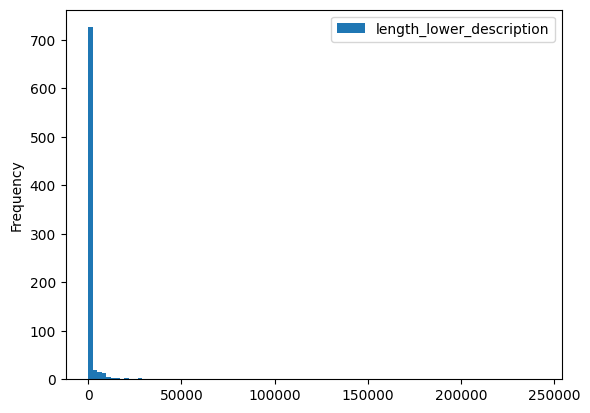

In [58]:
description_df.plot(kind='hist', y='length_lower_description', bins=100)

In [61]:
description_df.directory.value_counts()

repo_data/humanities            586
repo_data/public_history         96
repo_data/digital_history        92
repo_data/cultural_analytics     23
Name: directory, dtype: int64

In [60]:
alt.Chart(description_df[['directory', 'length_lower_description']]).mark_bar().encode(
    alt.X('length_lower_description:Q', bin=True),
    y='count()',
    row='directory:N'
)

alt.Chart(...)